In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap

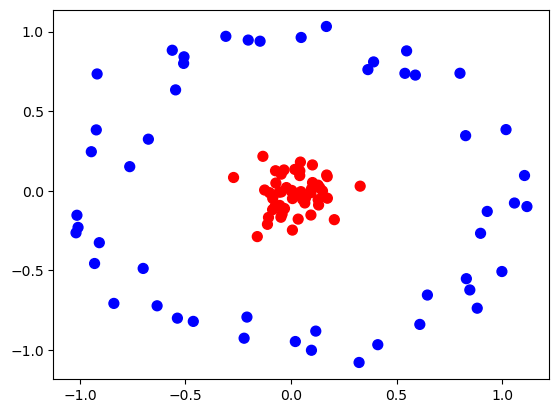

In [3]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='bwr')

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [5]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7

In [7]:
zero_one_colourmap = ListedColormap(('blue', 'red'))
def plot_decision_boundary(X, y, clf):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                                 stop = X_set[:, 0].max() + 1, 
                                 step = 0.01),
                       np.arange(start = X_set[:, 1].min() - 1, 
                                 stop = X_set[:, 1].max() + 1, 
                                 step = 0.01))
  
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                             X2.ravel()]).T).reshape(X1.shape),
               alpha = 0.75, 
               cmap = zero_one_colourmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = (zero_one_colourmap)(i), label = j)
    plt.title('SVM Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    return plt.show()

C:\Users\91975\AppData\Local\Temp\ipykernel_2268\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


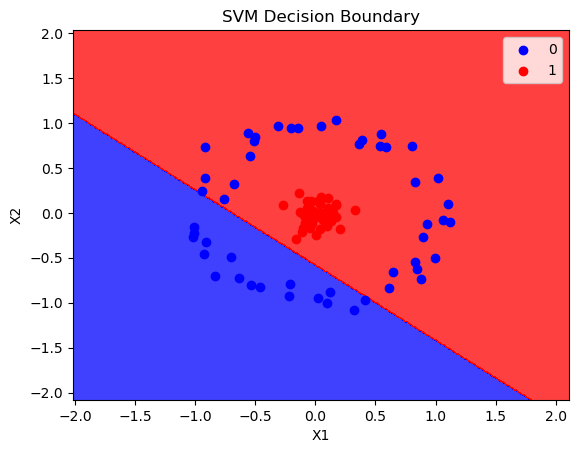

In [8]:
plot_decision_boundary(X, y, classifier)

## Convert Data into 3-D

In [9]:
def plot_3d_plot(X, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

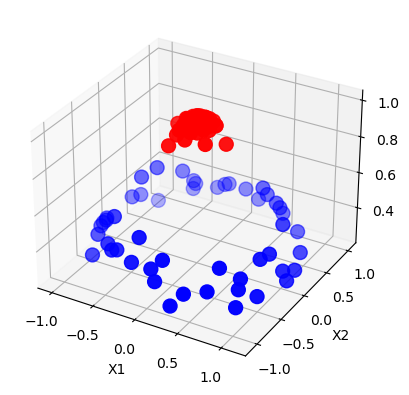

In [10]:
plot_3d_plot(X,y)

## rbf Kernel

In [11]:
rbf_classifier = SVC(kernel="rbf")
rbf_classifier.fit(X_train, y_train)
y_pred = rbf_classifier.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\91975\AppData\Local\Temp\ipykernel_2268\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


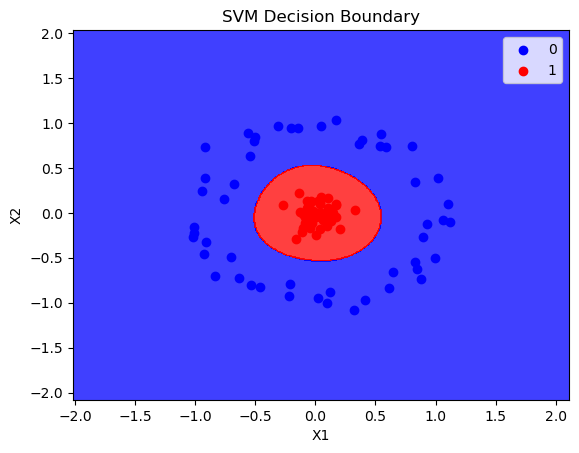

In [13]:
plot_decision_boundary(X, y, rbf_classifier)

## Ploynomial Kernel

In [14]:
poly_classifier = SVC(kernel="poly",degree=2)
poly_classifier.fit(X_train, y_train)
y_pred = poly_classifier.predict(X_test)

In [15]:
accuracy_score(y_test, y_pred)

1.0

C:\Users\91975\AppData\Local\Temp\ipykernel_2268\3603277588.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


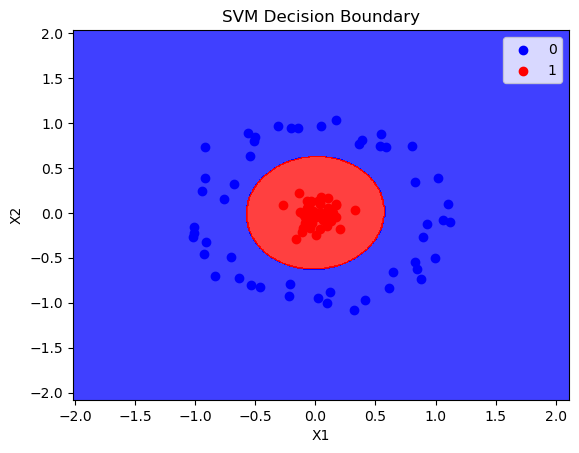

In [16]:
plot_decision_boundary(X, y, poly_classifier)

In [17]:
X

array([[ 1.71677754e-01,  8.93694455e-02],
       [-1.46321859e-01,  9.39991562e-01],
       [-7.38448976e-02, -9.27578915e-02],
       [ 8.82425532e-01, -7.37480702e-01],
       [ 2.05452828e-01, -1.81225705e-01],
       [-2.15605024e-02,  2.03677899e-02],
       [-8.63357898e-02, -4.77434448e-02],
       [-4.61522648e-02,  1.04650308e-01],
       [-1.00868454e+00, -2.29895937e-01],
       [ 3.91409660e-01,  8.09816207e-01],
       [ 1.83846403e-02,  1.34444934e-01],
       [-2.02483317e-01,  9.47083677e-01],
       [ 5.39898371e-01,  7.38184395e-01],
       [ 9.44854923e-02, -1.11249259e-02],
       [ 1.28504987e-01,  3.54328525e-02],
       [-4.19333010e-02, -1.46117988e-01],
       [ 1.36602527e-01,  1.88716449e-02],
       [-5.58654605e-02, -8.75724315e-03],
       [ 1.69188308e-01,  9.92588936e-02],
       [ 6.88360495e-03, -2.46765062e-01],
       [ 6.56624640e-02, -7.63643771e-02],
       [-1.11373496e-01, -2.10482813e-01],
       [-7.63799211e-01,  1.51795148e-01],
       [ 6.

In [18]:
np.exp(-(X**2)).sum(1)

array([1.96300176, 1.39211642, 1.98599465, 1.03950674, 1.92635832,
       1.99912049, 1.990297  , 1.9869803 , 1.31003787, 1.37698229,
       1.981749  , 1.36763407, 1.32703967, 1.99098847, 1.98236737,
       1.97711898, 1.9811567 , 1.99680723, 1.96197717, 1.94087653,
       1.98988317, 1.94433659, 1.53522562, 1.99323825, 1.96587909,
       1.33438656, 1.27685447, 1.99785464, 1.89546641, 1.96118636,
       1.37747503, 1.98913693, 1.97054261, 1.98691393, 1.39292023,
       1.92174135, 1.37614179, 1.26227882, 1.98673437, 1.28732043,
       1.98267921, 1.01356637, 1.9905043 , 1.31741274, 1.96360469,
       1.21360009, 1.4106242 , 1.97514046, 1.39104397, 1.89722048,
       1.33777079, 1.99775697, 1.98956379, 1.99998033, 1.18321241,
       1.43551034, 1.18733745, 1.1416348 , 1.49037616, 1.99758522,
       1.98454427, 1.96820316, 1.97852335, 1.21662096, 1.23254912,
       1.53376753, 1.30980138, 1.2990935 , 1.97793214, 1.23864042,
       1.20234246, 1.2758801 , 1.29596647, 1.29901809, 1.35018

In [19]:
X_new=np.exp(-(X**2))

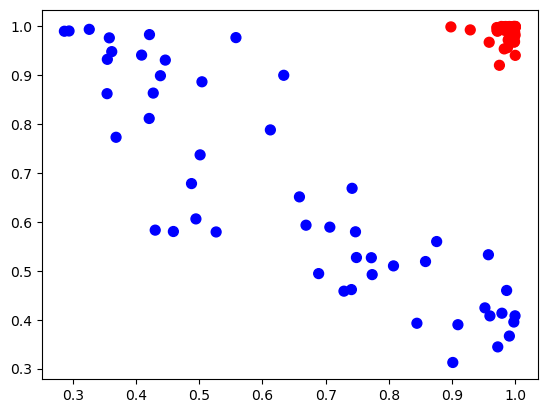

In [20]:
plt.scatter(X_new[:, 0], X_new[:, 1], c=y, s=50, cmap='bwr')